<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/Adattisztitas_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
class XLS_timeseries:
    import pandas as pd
    import os
    def __init__(self,fname=""):
        if fname=="":
            return 
        self.readfile(fname)

    def readfile(self,fname):
        from pandas import ExcelFile
        self.tabs = ExcelFile(fname).sheet_names 
        self.fname=fname
    
    def __str__(self):
        return(f"file name:{self.fname}, sheets: {self.tabs}")


        
    
    def get_data1s(self,sheet_name):
        '''
        Az excel 1 sheet felolvasása
        '''
        import pandas as pd
        fname=self.fname
        df=pd.read_excel(fname,sheet_name=sheet_name)
        df.columns=["Date","Value","Status"]
        bad_data=df[df["Status"]=="Bad Data"].index
        df.drop(index=bad_data,inplace=True)
        df.dropna(inplace=True)
        df.index=df.Date
        df.set_index("Date",inplace=True)
        df.drop(columns=["Status"], inplace=True)
        dfout=df.resample("10s").mean()
        dfout.interpolate('linear',inplace=True)
        self.df_base=dfout
        return(dfout)


    def resample(self,resample_str:str):
        self.DF=self.DF.resample(resample_str).mean()
        return(self.DF)


    def df_list(self):
        '''


        '''
        fname=self.fname
        tabs=self.tabs
        self.out_df_list=[]
        for tabx in tabs:
            dftab=self.get_data1s(tabx)
            #dftab.plot()
            self.out_df_list.append(dftab)
        return self.out_df_list 
    
    
    def df_concat(self):
        from pandas import concat
        self.df_list()
        dflist=self.out_df_list
        df_heads=self.tabs
        for index,name in enumerate(df_heads):
            dflist[index].columns=[name]
        out_df=concat(dflist,axis=1)
  
        out_df.dropna(inplace=True)
        self.DF=out_df
        return(out_df)
    
    def plot(self,index):
        if not (set(index).issubset(set(self.tabs))):
            return ("Key subset not found!")
        if len(self.DF.columns)<1:
            return
        plots=self.DF[index].plot()
        return plots

    def plotter(self,columnlist,colorlist=["b","r"]):
        import matplotlib.pyplot as plt
        df=self.DF
        plt.figure()
        plt.figure(figsize=(20,10))
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=14)
        plt.xlabel('time',fontsize=20)
        plt.ylabel(columnlist,fontsize=20)
        plt.title(f"{columnlist} vs. time",fontsize=20)
        targets = columnlist
    
        
        plt.scatter(df.index,df[columnlist[0]] , c = colorlist[0], s = 1,)
        plt.scatter(df.index,df[columnlist[1]] , c = colorlist[1], s = 1,)
    
        #plt.colorbar()
        plt.legend(targets,prop={'size': 20})
    
    def scatter(self,):
        import plotly.express as px
        fig=px.scatter(x=principal113[:,0],y=principal113[:,1],color=db.labels_,)
        fig.show()
        return(fig)

In [2]:
import pandas as pd
import os

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!ls "/content/drive/My Drive"

In [5]:
user="SL"

In [6]:
if user=="Anna":
    path = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Data/Abb/Szint1/május/"
else:
    path = "/content/drive/MyDrive/2022Anna/Data/Abb/"

In [7]:
def create_file_list(path_name, extension=".xlsx",debug=False):
 
  dir_path = os.path.dirname(path_name)
  eleresi_utak = []

  for root, dirs, files in os.walk(dir_path):
    for file in files:
      if file.endswith(extension):
        if debug:
          print(root+'/'+str(file))
        eleresi_utak.append(root+'/'+str(file))
  return (eleresi_utak)

In [8]:
file_list=create_file_list(path, ".xlsx")

In [9]:
len(file_list)

4546

In [21]:
file_list[1]

'/content/drive/MyDrive/2022Anna/Data/Abb/Sp/július/72C03_SC_202271.xlsx'

In [28]:
a=XLS_timeseries(file_list[1])

In [29]:
a.df_concat()

,A,Out,Sp,Pv,ISP
Date,,,,,
2022-07-01 00:00:30,1.0,100.0,0.0,124.280159,125.0
2022-07-01 00:00:40,1.0,100.0,0.0,124.280159,125.0
2022-07-01 00:00:50,1.0,100.0,0.0,124.280159,125.0
2022-07-01 00:01:00,1.0,100.0,0.0,124.280159,125.0
2022-07-01 00:01:10,1.0,100.0,0.0,124.295036,125.0
...,...,...,...,...,...
2022-07-01 23:59:00,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:59:10,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:59:20,1.0,100.0,0.0,124.339668,125.0


In [30]:
a.DF.tail(50)

,A,Out,Sp,Pv,ISP
Date,,,,,
2022-07-01 23:51:30,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:51:40,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:51:50,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:52:00,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:52:10,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:52:20,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:52:30,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:52:40,1.0,100.0,0.0,124.339668,125.0
2022-07-01 23:52:50,1.0,100.0,0.0,124.339668,125.0


<Figure size 432x288 with 0 Axes>

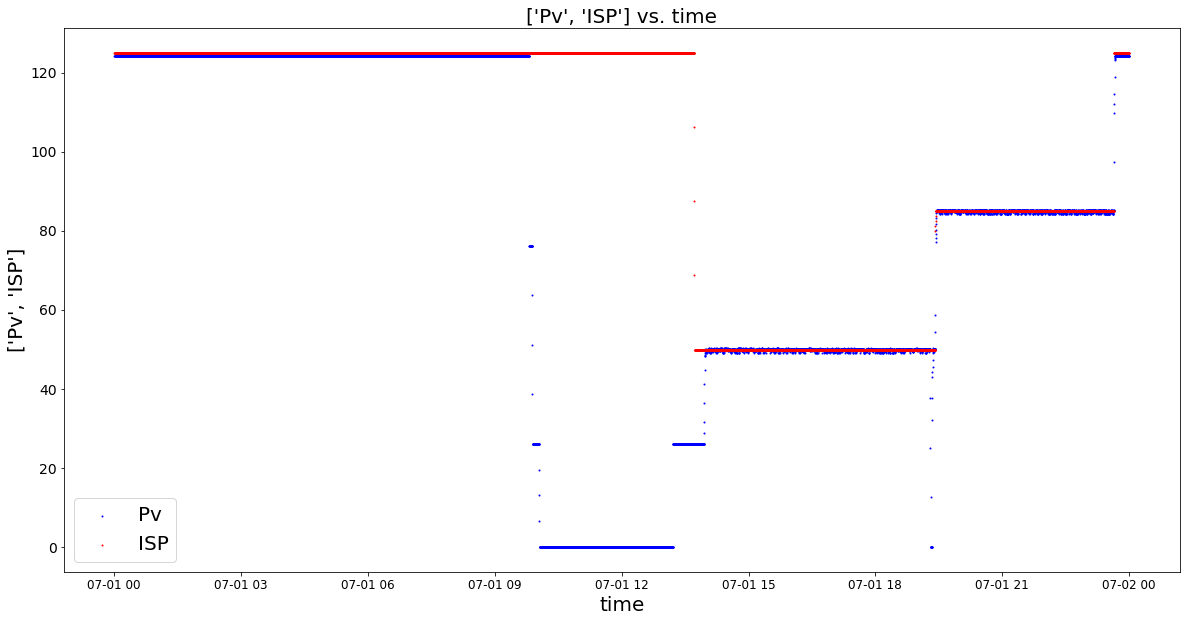

In [31]:
a.plotter(["Pv","ISP"])

In [ ]:
for i in range(2):
  
  urlname = file_list[0]
  print(urlname)
  _,fname = os.path.split(urlname)
  df=pd.read_excel(urlname,sheet_name=3)
  df.columns = ["Date","Value","Status"]
  df.index=df.Date
  df.set_index("Date",inplace=True)
  df.reset_index(inplace=True)
  new_range = pd.date_range(df.index.values[0], df.index.values[-1], freq='10S')
  df.reindex()
  df.set_index("Date",inplace=True)
  df.head()
  df_new=df.resample("1s").mean()
  df_new.interpolate('linear',inplace=True)
  #df_new.to_csv("blabla.csv")
  #!cp blabla.csv "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/2/"
  
  if user=="Anna":
    out_file_path="/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/2/"
  else:
    out_file_path="/content/drive/MyDrive/2022Anna/Datapipeline/2/"
    

    
  out_file_name=out_file_path+ + fname[0:-5] + '.csv'
  df_new.to_csv(out_file_name)





/content/drive/MyDrive/2022Anna/Data/Abb/Sp/július/72C03_TC_202271.xlsx


TypeError: ignored

In [ ]:
  urlname = file_list[0]
  print(urlname)
  _,fname = os.path.split(urlname)
  df=pd.read_excel(urlname,sheet_name=3)
  df.columns = ["Date","Value","Status"]
  df.index=df.Date
  df.set_index("Date",inplace=True)
  df.reset_index(inplace=True)
  new_range = pd.date_range(df.index.values[0], df.index.values[-1], freq='10S')
  df.reindex()
  df.set_index("Date",inplace=True)
  print(df.head())
  df_new=df.resample("1s").mean()
  df_new.interpolate('linear',inplace=True)
  #df_new.to_csv("blabla.csv")
  #!cp blabla.csv "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/2/"
  
  if user=="Anna":
    out_file_path="/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/2/"
  else:
    out_file_path="/content/drive/MyDrive/2022Anna/Datapipeline/2/"
    

    
  out_file_name=out_file_path+ + fname[0:-5] + '.csv'
  df_new.to_csv(out_file_name)



/content/drive/MyDrive/2022Anna/Data/Abb/Sp/július/72C03_TC_202271.xlsx
                         Value Status
Date                                 
2022-07-01 00:00:08  28.593117     OK
2022-07-01 00:00:28  28.663307     OK
2022-07-01 00:00:48  28.663307     OK
2022-07-01 00:00:48  28.883041     OK
2022-07-01 00:01:08  28.953232     OK


TypeError: ignored